# Chapter 13: Eigendecomposition

# Concepts

In [153]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [20]:
# Finding eigenvalues

matrix_a = np.array([
    [1, 2],
    [3, 4]
])

evals = np.linalg.eigh(matrix_a)[0]
print(evals)

[-0.85410197  5.85410197]


In [21]:
# Finding eigenvectors

evecs = np.linalg.eigh(matrix_a)[1]
print(evecs)

[[-0.85065081  0.52573111]
 [ 0.52573111  0.85065081]]


In [22]:
# Diagonalizing a matrix

diag_matrix_a = np.diag(evals)
print(diag_matrix_a)

[[-0.85410197  0.        ]
 [ 0.          5.85410197]]


In [23]:
# Orthogonal Eigenvectors

# Create a symmetrical matrix
random_matrix_a = np.random.randint(-3, 4, (3, 3))
symmetrical_matrix_a = random_matrix_a.T @ random_matrix_a

# perform eigendecomposition
evals, evecs = np.linalg.eigh(symmetrical_matrix_a)

# compute all pair-wise dot products of eigenvectors matrix
dot_product_1 = np.dot(evecs[:,0], evecs[:,1])
dot_product_2 = np.dot(evecs[:,0], evecs[:,2])
dot_product_3 = np.dot(evecs[:,1], evecs[:,2])
check = np.isclose(dot_product_1, 0) and np.isclose(dot_product_2, 0) and np.isclose(dot_product_3, 0)

print("All pair-wise dot products of the eigenvectors for a symmetrical matrix are equal to zero:", check)

All pair-wise dot products of the eigenvectors for a symmetrical matrix are equal to zero: True


In [24]:
# Real-valued evals (symmetrical matrix)

matrix_a = np.array([
    [-3, -3, 0],
    [-3, -2, 1],
    [0, 1, 2]
])

evals, evecs = np.linalg.eig(matrix_a)

print(evals.reshape(-1, 1))

[[-5.59707146]
 [ 0.22606174]
 [ 2.37100972]]


In [25]:
# Eigendecomposition of singular matrices

singular_matrix_a = np.array([
    [1, 4, 7],
    [2, 5, 8],
    [3, 6, 9]
])

evals, evecs = np.linalg.eig(singular_matrix_a)

print(f"Rank = {np.linalg.matrix_rank(singular_matrix_a)} \n")
print(f"evals: {np.round(evals, 2)} \n")
print(f"Eigenvectors: {np.round(evecs, 2)} \n")

Rank = 2 

Eigenvalues: [16.12 -1.12 -0.  ] 

Eigenvectors: [[-0.46 -0.88  0.41]
 [-0.57 -0.24 -0.82]
 [-0.68  0.4   0.41]] 



In [26]:
# Generalized eigendecomposition

# create correlated matrices
random_matrix_a = np.random.randn(4, 4)
matrix_a = random_matrix_a.T @ random_matrix_a
random_matrix_b = np.random.randn(4, 4)
matrix_b = random_matrix_b.T @ random_matrix_b + matrix_a / 10

evals, evecs = scipy.linalg.eigh(matrix_a, matrix_b)
print(f"Eigenvalues: {np.round(evals, 2)} \n")
print(f"Eigenvectors: {np.round(evecs, 2)} \n")

Eigenvalues: [0.05 0.4  5.14 6.95] 

Eigenvectors: [[ 0.04 -0.17  0.87 -0.47]
 [-0.26 -0.42 -0.6   0.89]
 [ 0.4  -0.03 -0.09 -0.12]
 [ 0.07  0.    0.32  0.78]] 



# Code Exercises

In [67]:
# Exercise 13-1 (Compare eigenvectors of a matrix and its inverse)

# Create symmetric matrix
matrix_a = np.random.randn(5, 5)
symmetrical_matrix_a = matrix_a.T @ matrix_a
matrix_a_inverse = np.linalg.inv(symmetrical_matrix_a)

# Calculate eigenvalues for the symmetrical matrix and its inverse
evals = np.linalg.eig(symmetrical_matrix_a)[0]
inverse_evals = np.linalg.eig(matrix_a_inverse)[0]

check = np.allclose(np.sort(evals), np.sort(1/inverse_evals))
print("Eigenvalues of a symmetrical matrix and reciprocal of eigenvalues of that matrix inversed are the same:", check)

Eigenvalues of a symmetrical matrix and reciprocal of eigenvalues of that matrix inversed are the same: True


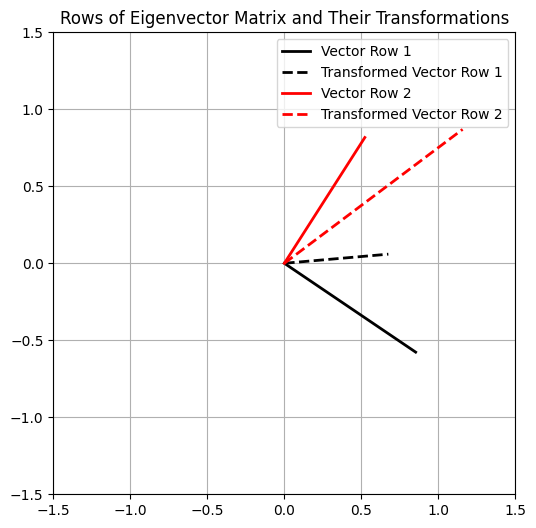

The plot demonstrates the failure of the geometric test of stretching without rotating the vectors.


In [92]:
# Define matrix
matrix_a = np.random.randn(2, 2)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(matrix_a)

# Use rows of the eigenvector matrix
vector_row_1 = eigenvectors[0, :]
vector_row_2 = eigenvectors[1, :]

# Multiply to create new vectors
transformed_vector_row_1 = matrix_a @ vector_row_1
transformed_vector_row_2 = matrix_a @ vector_row_2

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot vectors
ax.plot([0, vector_row_1[0]], [0, vector_row_1[1]], 'k', linewidth=2, label='Vector Row 1')
ax.plot([0, transformed_vector_row_1[0]], [0, transformed_vector_row_1[1]], 'k--', linewidth=2, label='Transformed Vector Row 1')

ax.plot([0, vector_row_2[0]], [0, vector_row_2[1]], 'r', linewidth=2, label='Vector Row 2')
ax.plot([0, transformed_vector_row_2[0]], [0, transformed_vector_row_2[1]], 'r--', linewidth=2, label='Transformed Vector Row 2')

# Adjust the graph
ax.axis('square')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.grid()
ax.legend()

ax.set_title('Rows of Eigenvector Matrix and Their Transformations')

plt.show()

print("The plot demonstrates the failure of the geometric test of stretching without rotating the vectors.")


Reconstruction differences for no swapping:
[[ 0.  0.  0. -0.  0.]
 [ 0. -0.  0.  0. -0.]
 [ 0.  0. -0.  0. -0.]
 [-0.  0.  0.  0.  0.]
 [ 0.  0. -0.  0.  0.]]
Frobenius distance: 3.7742352793868764e-15

Reconstruction differences for all eigenvalues swapped:
[[ 3.8286  1.615  -1.6435 -1.4919  1.7572]
 [ 1.615  -0.2353  1.6496 -0.3242 -1.2945]
 [-1.6435  1.6496 -5.2774 -0.3064  4.4334]
 [-1.4919 -0.3242 -0.3064  5.3556  0.4526]
 [ 1.7572 -1.2945  4.4334  0.4526 -3.6714]]
Frobenius distance: 12.445195821606383

Reconstruction differences for largest two eigenvalues swapped:
[[ 1.2295  0.7548  0.4229 -1.8752  0.4635]
 [ 0.7548 -0.9052 -1.3454 -0.4726 -1.0418]
 [ 0.4229 -1.3454 -1.7369  0.151  -1.3961]
 [-1.8752 -0.4726  0.151   2.5234 -0.0491]
 [ 0.4635 -1.0418 -1.3961 -0.0491 -1.1108]]
Frobenius distance: 5.6652772277620675

Reconstruction differences for smallest two eigenvalues swapped:
[[ 0.0106  0.0328  0.0622  0.0083 -0.1049]
 [ 0.0328 -0.3026 -0.0118 -0.0255  0.3135]
 [ 0.0622 -0

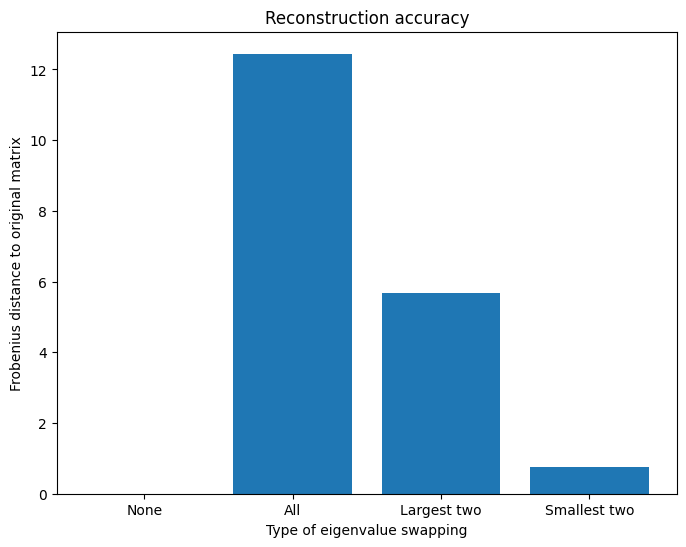

In [96]:
def create_symmetric_matrix(size):
    matrix = np.random.randn(size, size)
    return np.round(matrix.T + matrix)

def diagonalize_matrix(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues, eigenvectors, np.diag(eigenvalues)

def reconstruct_matrix(eigenvectors, diagonal_matrix):
    return eigenvectors @ diagonal_matrix @ eigenvectors.T

def compute_reconstruction_accuracy(original_matrix, reconstructed_matrix):
    return np.sqrt(np.sum((original_matrix - reconstructed_matrix) ** 2))

def swap_eigenvalues(eigenvalues, indices):
    swapped_eigenvalues = eigenvalues[indices]
    return np.diag(swapped_eigenvalues)

def plot_accuracies(accuracies, labels):
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(accuracies)), accuracies)
    plt.xticks(range(len(accuracies)), labels)
    plt.ylabel('Frobenius distance to original matrix')
    plt.xlabel('Type of eigenvalue swapping')
    plt.title('Reconstruction accuracy')
    plt.show()


matrix_size = 5
reconstruction_accuracies = np.zeros(4)

symmetric_matrix = create_symmetric_matrix(matrix_size)

eigenvalues, eigenvectors, diagonal_matrix = diagonalize_matrix(symmetric_matrix)

# No swapping
reconstructed_matrix = reconstruct_matrix(eigenvectors, diagonal_matrix)
reconstruction_accuracies[0] = compute_reconstruction_accuracy(symmetric_matrix, reconstructed_matrix)
print(f'\nReconstruction differences for no swapping:\n{np.round(symmetric_matrix - reconstructed_matrix, 4)}')
print(f'Frobenius distance: {reconstruction_accuracies[0]}')

# All eigenvalues swapped
permuted_diagonal_matrix = swap_eigenvalues(eigenvalues, np.random.permutation(matrix_size))
reconstructed_matrix = reconstruct_matrix(eigenvectors, permuted_diagonal_matrix)
reconstruction_accuracies[1] = compute_reconstruction_accuracy(symmetric_matrix, reconstructed_matrix)
print(f'\nReconstruction differences for all eigenvalues swapped:\n{np.round(symmetric_matrix - reconstructed_matrix, 4)}')
print(f'Frobenius distance: {reconstruction_accuracies[1]}')

# Swap largest two eigenvalues
sorted_indices = np.argsort(eigenvalues)
swapped_indices_largest = sorted_indices[np.r_[np.arange(matrix_size-2), matrix_size-1, matrix_size-2]][::-1]
swapped_diagonal_matrix_largest = swap_eigenvalues(eigenvalues, swapped_indices_largest)
reconstructed_matrix = reconstruct_matrix(eigenvectors, swapped_diagonal_matrix_largest)
reconstruction_accuracies[2] = compute_reconstruction_accuracy(symmetric_matrix, reconstructed_matrix)
print(f'\nReconstruction differences for largest two eigenvalues swapped:\n{np.round(symmetric_matrix - reconstructed_matrix, 4)}')
print(f'Frobenius distance: {reconstruction_accuracies[2]}')

# Swap smallest two eigenvalues
swapped_indices_smallest = sorted_indices[np.r_[1, 0, np.arange(2, matrix_size)]][::-1]
swapped_diagonal_matrix_smallest = swap_eigenvalues(eigenvalues, swapped_indices_smallest)
reconstructed_matrix = reconstruct_matrix(eigenvectors, swapped_diagonal_matrix_smallest)
reconstruction_accuracies[3] = compute_reconstruction_accuracy(symmetric_matrix, reconstructed_matrix)
print(f'\nReconstruction differences for smallest two eigenvalues swapped:\n{np.round(symmetric_matrix - reconstructed_matrix, 4)}')
print(f'Frobenius distance: {reconstruction_accuracies[3]}')

# Plot the results
labels = ['None', 'All', 'Largest two', 'Smallest two']
plot_accuracies(reconstruction_accuracies, labels)

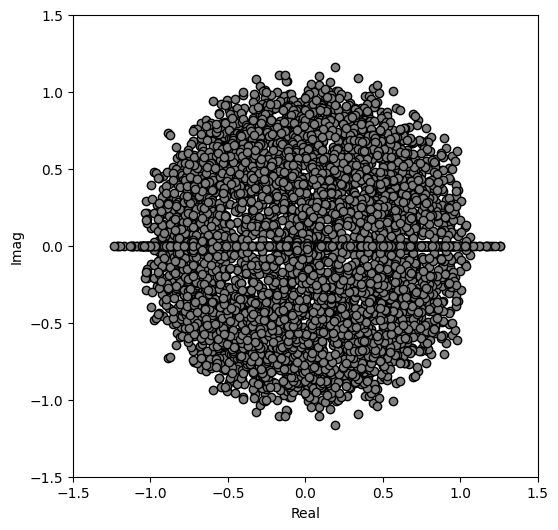

In [99]:
# Exercise 13-4 (Show that the eigenvalues of a random matrix are distributed in a circle with the radius proportional to the matrix size)

n_iterations = 123
matrix_size = 42
evals = np.zeros((n_iterations, matrix_size),dtype=complex)

# create the matrices and get their scaled eigenvalues
for i in range(n_iterations):
  random_matrix_a = np.random.randn(matrix_size, matrix_size)
  evals[i,:] = np.linalg.eig(random_matrix_a)[0] / np.sqrt(matrix_size)

# Create plot
plt.figure(figsize=(6,6))

plt.plot(np.real(evals),np.imag(evals),'ko',markerfacecolor='grey')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.xlabel('Real')
plt.ylabel('Imag')
plt.show()

In [118]:
# Exercise 13-5 (Eigenvector is the basis for the null-space of the eigenvalue-shifted matrix)

# Create a symmetric positive-definite matrix
matrix_size = 3
random_matrix = np.random.randn(matrix_size, matrix_size)
symmetric_positive_definite_matrix = random_matrix @ random_matrix.T

# Eigendecompose the matrix
evals, evecs = np.linalg.eig(symmetric_positive_definite_matrix)

# Compare the eigenvectors with the null space of (A - λI)
for i in range(matrix_size):
    # Get the null space vector of the shifted matrix
    shifted_matrix = symmetric_positive_definite_matrix - evals[i] * np.eye(matrix_size)
    null_space_vector = scipy.linalg.null_space(shifted_matrix)
    
    # Check for a match with the eigenvector via correlation (normalizes for magnitudes)
    correlation_coefficient = np.corrcoef(null_space_vector.T, evecs[[i], :])[0, 1]
    
    # Print the absolute value of the correlation coefficient
    print(f'Correlation between null space of (A - λI) and eigenvector {i}: {np.abs(correlation_coefficient):.2f}')


Correlation between null space of (A - λI) and eigenvector 0: 1.00
Correlation between null space of (A - λI) and eigenvector 1: 1.00
Correlation between null space of (A - λI) and eigenvector 2: 1.00


In [152]:
# Exercise 13-6 (Alternative method of creating random symmetrical matrices)

vector_a = [1, 2, 3, 4]
diag_matrix_a = np.diag(vector_a)

random_matrix_a = np.random.randn(4, 4)
matrix_q, matrix_r = np.linalg.qr(random_matrix_a)

# Use these results as mock eigenvectors as eigenvalues
evals = diag_matrix_a
evecs = matrix_q

# Reconstruct matrix
reconstructed_matrix = evecs @ evals @ evecs.T

check_1 = scipy.linalg.issymmetric(reconstructed_matrix)
print("Reconstructed matrix is symmetrical:", check_1)

evals_check = np.diag(np.sort(np.linalg.eig(reconstructed_matrix)[0]))
check_2 = np.allclose(evals, evals_check)
print("Eigenvalues of reconstructed matrix are equal to our mock eigenvalues:", check_2)

Reconstructed matrix is symmetrical: True
Eigenvalues of reconstructed matrix are equal to our mock eigenvalues: True


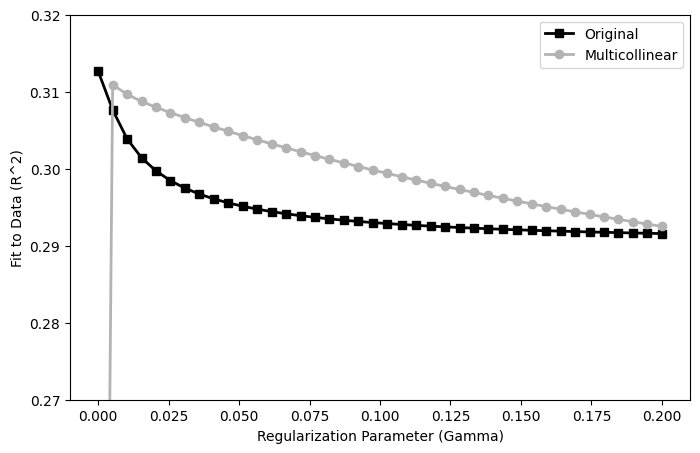

In [161]:
# Exercise 13-7 (Shrinkage regularization)

# Gather data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
data = pd.read_csv(url,sep=',',encoding='unicode_escape')

# Create the design matrix
design_matrix = data[['Rainfall(mm)', 'Temperature(°C)']].to_numpy()
design_matrix = np.append(design_matrix, np.ones((design_matrix.shape[0], 1)), axis=1)

# Create the multicollinear design matrix
lincombo = 4 * design_matrix[:, 0] + 0.4 * design_matrix[:, 1]
design_matrix_multicollinear = np.append(design_matrix, lincombo.reshape(-1, 1), axis=1)

# Grab the target variable
target_variable = data[["Rented Bike Count"]].to_numpy()

# Compute the average of the eigenvalues
average_eigenvalue = np.mean(np.linalg.eigvals(design_matrix.T @ design_matrix))
average_eigenvalue_multicollinear = np.mean(np.linalg.eigvals(design_matrix_multicollinear.T @ design_matrix_multicollinear))

# Range of gamma parameters
gamma_values = np.linspace(0, 0.2, 40)

# Initialize R^2 vectors
r2_values = np.zeros(gamma_values.shape)
r2_multicollinear_values = np.zeros(gamma_values.shape)

# Loop over gamma values
for index in range(len(gamma_values)):
    gamma = gamma_values[index]

    # Regularization parameter for the original design matrix
    lambda_value = gamma * average_eigenvalue

    # Compute left-inverse for the original design matrix
    left_inverse = np.linalg.inv(design_matrix.T @ design_matrix + lambda_value * np.eye(design_matrix.shape[1])) @ design_matrix.T

    # Compute beta and predicted data for the original design matrix
    beta = left_inverse @ target_variable
    predictions = design_matrix @ beta

    # Model fit to data for the original design matrix
    r2_values[index] = np.corrcoef(target_variable.T, predictions.T)[0, 1]**2

    # Regularization parameter for the multicollinear design matrix
    lambda_multicollinear = gamma * average_eigenvalue_multicollinear

    # Compute left-inverse for the multicollinear design matrix
    left_inverse_multicollinear = np.linalg.inv(design_matrix_multicollinear.T @ design_matrix_multicollinear + lambda_multicollinear * np.eye(design_matrix_multicollinear.shape[1])) @ design_matrix_multicollinear.T

    # Compute beta and predicted data for the multicollinear design matrix
    beta_multicollinear = left_inverse_multicollinear @ target_variable
    predictions_multicollinear = design_matrix_multicollinear @ beta_multicollinear

    # Model fit to data for the multicollinear design matrix
    r2_multicollinear_values[index] = np.corrcoef(target_variable.T, predictions_multicollinear.T)[0, 1]**2

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(gamma_values, r2_values, 'ks-', linewidth=2, label='Original')  # Original in black squares
plt.plot(gamma_values, r2_multicollinear_values, 'o-', linewidth=2, label='Multicollinear', color=[0.7, 0.7, 0.7])  # Multicollinear in gray circles
plt.xlabel('Regularization Parameter (Gamma)')
plt.ylabel('Fit to Data (R^2)')
plt.ylim([0.27, 0.32])
plt.legend()
plt.show()


In [260]:
# Exercise 13-8 (Create surrogate data with specified correlation matrix)

# correlation matrix
correlation_matrix = np.array([[ 1,.2,.9],
              [.2, 1,.3],
              [.9,.3, 1] ])

# eigendecomposition
evals, evecs = np.linalg.eig(correlation_matrix)
evals_matrix = np.diag(evals)

# create new data with imposed correlation
random_matrix_x = np.random.randn(3,10000)
matrix_y = evecs @ np.sqrt(evals_matrix) @ random_matrix_x

matrix_y_correlation_coefficients = np.corrcoef(matrix_y)
check = np.allclose(correlation_matrix, matrix_y_correlation_coefficients, atol=0.01)

print("Corellation coefficients of surrogate data equals the specified values:", check)

Corellation coefficients of surrogate data equals the specified values: True


In [265]:
# Exercise 13-9 (Remove imposed correlations by whitening)

whitened_matrix = matrix_y.T @ evecs @ np.linalg.inv(np.sqrt(evals_matrix))
whitened_matrix_correlation_coefficients = np.corrcoef(whitened_matrix.T)

check = np.allclose(whitened_matrix_correlation_coefficients, np.eye(3), atol= 0.015)
print("Correlation matrix of whitened matrix equals the Identity Matrix:", check)


Correlation matrix of whitened matrix equals the Identity Matrix: True


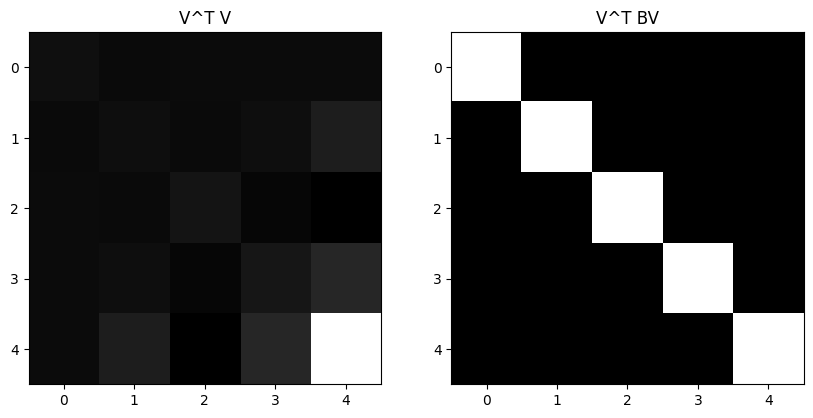

In [274]:
# Exercise 13-10 (Confirm eigenvectors are not orthogonal when using generalized eigendecomposition)

# Create two symmetrical matrices
matrix_size = 5
matrix_a = np.random.randn(matrix_size, matrix_size)
symmetrical_matrix_a = matrix_a.T @ matrix_a
matrix_b = np.random.randn(matrix_size, matrix_size)
symmetrical_matrix_b = matrix_b.T @ matrix_b

# Eigendecomposition
evals, evecs = scipy.linalg.eigh(symmetrical_matrix_a, symmetrical_matrix_b)

# eigenvectors times their transposes
VV  = evecs.T @ evecs
VBV = evecs.T @ symmetrical_matrix_b @ evecs

# Create plot
_, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].imshow(VV,cmap='gray')
axs[0].set_title('V^T V')
axs[1].imshow(VBV,cmap='gray')
axs[1].set_title('V^T BV')
plt.show()

In [279]:
# Exercise 13-11 (Scaling of eigenvectors)

# Create the matrix A with random integer values between -14 and 14
random_matrix = np.random.randint(-14, 15, (4, 4))

# Perform eigendecomposition
evals, evecs = np.linalg.eig(random_matrix)
evecs_scaled = evecs * np.pi  # Scale the eigenvectors by pi
evals_matrix = np.diag(evals)
inverse_evecs_scaled = np.linalg.inv(evecs_scaled)

# Test for accurate reconstruction
reconstructed_matrix = evecs_scaled @ evals_matrix @ inverse_evecs_scaled
print('Reconstructed matrix minus original matrix:')
print(np.round(reconstructed_matrix - random_matrix, 3))
print('\n')

# Calculate and print the norms of the eigenvectors
for i in range(random_matrix.shape[0]):
    norm = np.sqrt(np.sum(evecs_scaled[:, i] * np.conj(evecs_scaled[:, i])))
    print(f'Eigenvector {i} has norm {norm}')
print('\n')

# Notes:
# Scaling the eigenvector matrix (V) does not affect the reconstruction accuracy because the scaling factor is normalized out in the matrix inverse.


# Repeat for a symmetric matrix using the transpose of V instead of the inverse of V

# Create a symmetric matrix by multiplying a random matrix by its transpose
symmetric_matrix = np.random.randint(-14, 15, (4, 4))
symmetric_matrix = symmetric_matrix.T @ symmetric_matrix

# Perform eigendecomposition
evals_symmetric, evecs_symmetric = np.linalg.eig(symmetric_matrix)
evecs_symmetric_scaled = evecs_symmetric * np.pi  # Scale the eigenvectors by pi
evals_matrix_symmetric = np.diag(evals_symmetric)
transpose_evecs_symmetric_scaled = evecs_symmetric_scaled.T

# Test for accurate reconstruction
reconstructed_symmetric_matrix = evecs_symmetric_scaled @ evals_matrix_symmetric @ transpose_evecs_symmetric_scaled
print('Reconstructed symmetric matrix minus original matrix:')
print(np.round(reconstructed_symmetric_matrix - symmetric_matrix, 3))
print('\n')

# Calculate and print the norms of the eigenvectors for the symmetric matrix
for i in range(symmetric_matrix.shape[0]):
    norm = np.sqrt(np.sum(evecs_symmetric_scaled[:, i] * np.conj(evecs_symmetric_scaled[:, i])))
    print(f'Eigenvector {i} has norm {norm}')

# Notes:
# Scaling the eigenvector matrix (V) does matter for a symmetric matrix when using the transpose of V instead of its inverse because V is not explicitly inverted.

Reconstructed matrix minus original matrix:
[[ 0.+0.j  0.+0.j  0.+0.j -0.+0.j]
 [-0.+0.j  0.-0.j  0.-0.j -0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -0.+0.j]
 [ 0.-0.j -0.+0.j -0.-0.j  0.-0.j]]


Eigenvector 0 has norm (3.1415926535897927+0j)
Eigenvector 1 has norm (3.1415926535897927+0j)
Eigenvector 2 has norm (3.141592653589793+0j)
Eigenvector 3 has norm (3.1415926535897927+0j)


Reconstructed symmetric matrix minus original matrix:
[[ 5082.283  1179.657 -1011.135  1676.355]
 [ 1179.657  1383.658  1374.789  -860.352]
 [-1011.135  1374.789  4337.237 -3095.492]
 [ 1676.355  -860.352 -3095.492  2474.62 ]]


Eigenvector 0 has norm 3.1415926535897927
Eigenvector 1 has norm 3.1415926535897927
Eigenvector 2 has norm 3.1415926535897936
Eigenvector 3 has norm 3.141592653589793
